## MNIST Classification using Functional Model

The TensorFlow Keras API can also be used to construct more complicated networks using the Functional Model. This may look a little bit confusing at first, because each call to the TensorFlow Keras API will create and return an instance that is itself callable. It is not clear whether it is a function or an object - but we can call it as if it is a function. This allow us to build computational graphs that are more complex than the Sequential Model allows.

Rest of the things remain same. Only change can be visible in defining the model.

#### 1. Import required Libraries

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
# Images, plots, display, and visualization
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import pandas as pd
import numpy as np
import IPython
from PIL import Image

import math

print("TensorFlow version ", tf.__version__)
print("TensorFlow Keras version ", keras.__version__)

TensorFlow version  1.12.0
TensorFlow Keras version  2.1.6-tf


In [3]:
%matplotlib inline
style.use('ggplot')

#### 2. Load the dataset

In [4]:
mnist = keras.datasets.mnist

"""Load the data"""
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

| Dataset | Images | Labels |
| ------- | ------ | ------ |
| <b>Train</b> | 60000 | 60000 |
| <b>Test</b> | 10000 | 10000 |

#### 3. Reshape our images

In [5]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

#### 4. Normalized our data

In [6]:
max_pixel = 255
train_images = train_images / max_pixel
test_images = test_images / max_pixel

#### 5. Build the model

In [7]:
# Create an input layer
inputs = Input(shape=(train_images[0].shape))

# First convolutional layer with ReLU-activation and max-pooling
x = Conv2D(filters = 16, kernel_size = (5, 5), strides = 1, padding = 'same', 
                     activation = 'relu', name = 'layer_conv1')(inputs)
x = MaxPooling2D(pool_size = (2, 2), strides = 2)(x)

# Second convolution layer with ReLU-activation and max-pooling
x = Conv2D(filters = 36, kernel_size = (5, 5), strides = 1, padding = 'same', 
                     activation = 'relu', name = 'layer_conv2')(x)
x = MaxPooling2D(pool_size = (2, 2), strides = 2)(x)

# Add Dropout layer
x = Dropout(rate = 0.5)(x)

# flatten the output of the conv-layer
x = Flatten()(x)

# first fully connected dense layer with ReLU-activation 
x = Dense(units = 128, activation = 'relu')(x)

# Last fully connected dense layer with softmax-activation
predictions = Dense(units = 10, activation = 'softmax')(x)

#### 6. Model Compilation

We have now defined the architecture of the model with its input and output. We now have to create a Keras model and compile it with a loss-function and optimizer, so it is ready for training.

Create a new instance of the Keras Functional Model. We give it the inputs and outputs of the Convolutional Neural Network that we constructed above.

In [8]:
model = Model(inputs = inputs, outputs = predictions)

In [9]:
model.compile(optimizer = tf.train.AdamOptimizer(),
             loss = 'sparse_categorical_crossentropy', # used in case of classification problems
             metrics = ['accuracy']) 

In [10]:
"""Look at the model summary"""
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1764)              0         
__________

#### 7. Train the model

In [11]:
EPOCHS = 5
BATCH_SIZE = 128
history = model.fit(x = train_images, y = train_labels, epochs = EPOCHS, validation_split = 0.2, 
          batch_size = BATCH_SIZE, verbose = 1 )

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 112s 2ms/step - loss: 0.2897 - acc: 0.9094 - val_loss: 0.0778 - val_acc: 0.9769
Epoch 2/5
48000/48000 [==============================] - 114s 2ms/step - loss: 0.0914 - acc: 0.9716 - val_loss: 0.0532 - val_acc: 0.9841
Epoch 3/5
48000/48000 [==============================] - 113s 2ms/step - loss: 0.0681 - acc: 0.9781 - val_loss: 0.0417 - val_acc: 0.9868
Epoch 4/5
48000/48000 [==============================] - 117s 2ms/step - loss: 0.0520 - acc: 0.9839 - val_loss: 0.0422 - val_acc: 0.9879
Epoch 5/5
48000/48000 [==============================] - 119s 2ms/step - loss: 0.0470 - acc: 0.9845 - val_loss: 0.0379 - val_acc: 0.9892


Let's visualize the model training process

In [12]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

,val_loss,val_acc,loss,acc,epoch
0,0.077826,0.976917,0.289672,0.909396,0
1,0.053218,0.984083,0.091409,0.971562,1
2,0.041656,0.986833,0.068106,0.978146,2
3,0.042182,0.987917,0.052022,0.983896,3
4,0.037875,0.989167,0.047025,0.984500,4


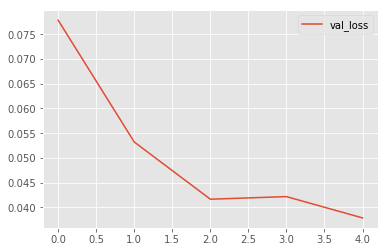

In [13]:
sns.lineplot(data = hist['val_loss'], label = 'val_loss')

We can conclude from the above 'line plot' that the validation loss keep on decreasing after every epoch.

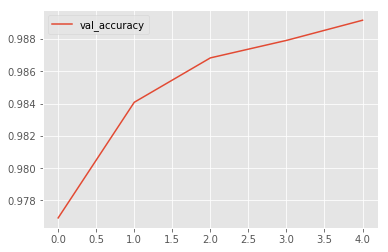

In [14]:
sns.lineplot(data = hist['val_acc'], label = 'val_accuracy')

We can conclude from the above 'line plot' that the validation accuracy keep on increasing after every epoch. That's the good point.

#### 8. Test the model

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy: ", test_acc)
print("Test Loss: ", test_loss)

10000/10000 [==============================] - 9s 949us/step
Test Accuracy:  0.9896
Test Loss:  0.03142303820503876


Test Accuracy is near to 99%

#### 9. Make Prediction

In [17]:
# Look at top ten samples of testing dataset
for i in range(10):
    preds = model.predict(test_images)[i]
    true = test_labels[i]
    print("True: {} and Predicted: {}".format(true, np.argmax(preds)))

True: 7 and Predicted: 7
True: 2 and Predicted: 2
True: 1 and Predicted: 1
True: 0 and Predicted: 0
True: 4 and Predicted: 4
True: 1 and Predicted: 1
True: 4 and Predicted: 4
True: 9 and Predicted: 9
True: 5 and Predicted: 5
True: 9 and Predicted: 9


#### 10. Mis-Classified Images

We can plot the examples of some miss-classified images from the test dataset.

In [18]:
def plot_mis_class_imgs():
    test_preds = np.argmax(model.predict(test_images), axis = 1)
    incorrect = (test_preds != test_labels)
    # get images wrong classified
    images = test_images[incorrect]
    # true labels of wrong classified images
    test_cls = test_labels[incorrect]
    # predicted labels of wrong classified images
    test_preds = np.argmax(model.predict(images), axis = 1)
    print(test_cls)
    print(test_preds)
    print('{} percentage images are miss-classified.'.format((len(test_preds)/100)))
    
    # plot the images
    plt.figure(figsize = (15, 2))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[i].reshape(28,28), cmap = plt.cm.binary)
        plt.xlabel("True: {} and Pred: {}".format(test_cls[i], test_preds[i]))
    

[6 5 6 8 5 7 4 8 6 7 7 9 9 5 8 8 5 1 8 3 9 5 7 8 9 5 1 5 3 6 4 6 1 1 9 2 9
 5 6 5 8 5 9 9 8 1 8 6 9 6 5 8 7 8 1 9 9 2 8 9 7 3 4 5 8 9 1 6 8 8 3 8 9 4
 8 8 8 5 3 5 5 5 9 8 9 1 7 0 8 0 5 1 8 0 8 7 7 0 9 4 6 9 5 4]
[0 3 0 2 3 2 9 9 5 2 2 4 5 7 0 2 3 5 7 7 5 3 2 3 4 6 7 3 7 0 9 1 3 3 1 0 7
 3 1 3 0 7 5 7 3 2 9 0 1 4 0 9 2 3 3 4 3 7 2 7 3 2 7 3 7 1 2 0 9 7 5 0 4 9
 6 4 7 3 8 9 3 9 0 9 7 7 1 7 7 8 3 6 3 6 5 2 2 1 7 7 3 7 6 9]
1.04 percentage images are miss-classified.


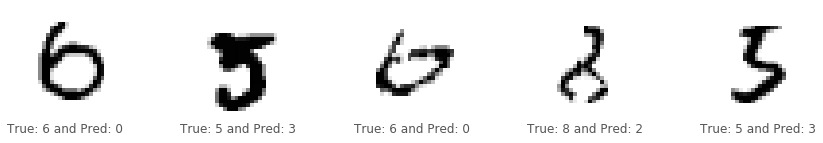

In [19]:
plot_mis_class_imgs()

#### 11. Plotting Convolution Layer output

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1764)              0         
__________

We ccan count the indices from the above output summary, to get the layers we want.

In [21]:
# The input layer at index 0
layer_input = model.layers[0]
layer_input

In [22]:
# First convolutional layer at index 1
layer_conv1 = model.layers[1]
layer_conv1

In [23]:
# Second convolutional layer at index 3
layer_conv2 = model.layers[3]
layer_conv2

Output of the first convolution layer

Let's take an example

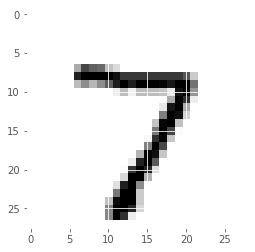

In [25]:
rescaled_data = test_images[0].reshape(28, 28)
plt.imshow(rescaled_data, cmap=plt.cm.binary)
plt.show()

Take an example of test image at index 0 and,

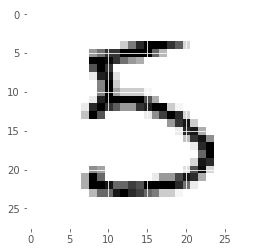

In [26]:
rescaled_data = test_images[15].reshape(28, 28)
plt.imshow(rescaled_data, cmap=plt.cm.binary)
plt.show()

Take another example of test image at index 15.

Now we are ready to see the output of first convolution layer on above two examples.

In [27]:
output_conv1 = K.function(inputs=[layer_input.input],
                          outputs=[layer_conv1.output])

After this we can call the below function with the input image. Note that the image is wrapped in two lists because the function expects an array of that dimensionality. Likewise, the function returns an array with one more dimensionality than we want so we just take the first element.

In [28]:
layer_output1 = output_conv1([[test_images[0]]])[0]
layer_output1.shape

(1, 28, 28, 16)

We can plot the output of all the 16 channels of the convolutional layer.

In [40]:
def plot_conv_output(values):
    num_filters = values.shape[3]
    num_grids = math.ceil(math.sqrt(num_filters))
    fig, axes = plt.subplots(num_grids, num_grids)
    for i, ax in enumerate(axes.flat):
        if i < num_filters:
            # get the output image of the ith filter
            img = values[0, :, :, i]
            
            ax.imshow(img, interpolation='nearest', cmap='binary')
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

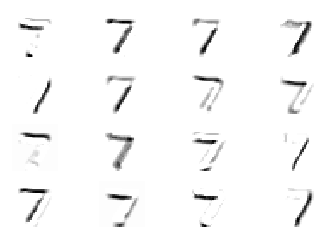

In [41]:
plot_conv_output(layer_output1)

The above images shows the first convolutional layer output of the test image of 7.

In [42]:
layer_output2 = output_conv1([[test_images[15]]])[0]
layer_output2.shape

(1, 28, 28, 16)

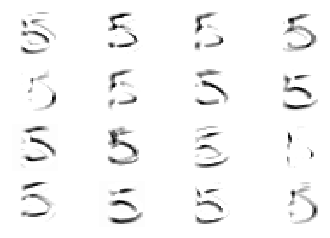

In [43]:
plot_conv_output(layer_output2)

The above images are the output of the first convolutional layer of the test image of 5.

Now, let's see the outputof the second convolutional layer.

In [44]:
output_conv2 = K.function(inputs=[layer_input.input],
                          outputs=[layer_conv2.output])

In [46]:
layer_output3 = output_conv2([[test_images[0]]])[0]
layer_output3.shape

(1, 14, 14, 36)

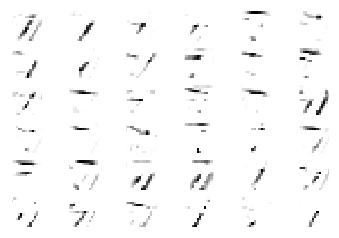

In [47]:
plot_conv_output(layer_output3)

The above images are the output from 36 channels of the second convolutional layer of test image of 7.

In [50]:
layer_output4 = output_conv2([[test_images[15]]])[0]
layer_output4.shape

(1, 14, 14, 36)

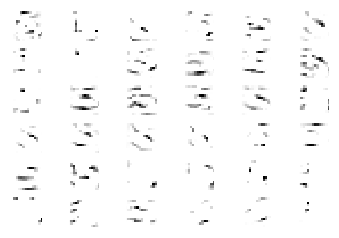

In [51]:
plot_conv_output(layer_output4)

The above images are the output from the 36 channels of the second convolutional layer of test image of 5.

#### 12. Save the entire model

In [52]:
model.save('mnist_functional_model.h5')

Now, our model is successfully saved.